In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [3]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/300x/pixie3d-n0=300x.scratch/"

In [4]:
pxr.pixieload(filepath+"pixie3d.h5")

timesteps= 391
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Te', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J^1', 'J^2', 'J^3', 'JxRho', 'JxTe', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'F_1', 'F_2', 'F_3', 'Int. heat src', 'Poloidal flux', 'chi par', 'chi perp', 'diff', 'eta', 'h_eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'pi+pe', 'q factor', '|J|']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Rho_pert', 'Te_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [512]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

## Loading small arrays

In [5]:
#Bx = pxr.load_array(0,0,638,645)
#By = pxr.load_array(0,1,638,645)
#Bz = pxr.load_array(0,2,638,645)
B1 = pxr.load_array(1,0,40,44) # small2
B2 = pxr.load_array(1,1,40,44) 
B3 = pxr.load_array(1,2,40,44)
#B_1 = pxr.load_array(2,0,638,645) # small2
#B_2 = pxr.load_array(2,1,638,645) 
#B_3 = pxr.load_array(2,2,638,645)

In [6]:
psi = pxr.load_array(3,7,40,44)

In [7]:
psit = np.mean(psi,axis=2)

In [389]:
#B1 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth.scratch/B1.npy")
#B2 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth.scratch/B1.npy")
#B3 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth.scratch/B1.npy")
#B1t = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth.scratch/B1t.npy")
#B2t = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth.scratch/B2t.npy")

In [14]:
psi.shape

(129, 65, 33, 4)

## Cell Interpolations

In [8]:
pxr.Grid_for_Cell_Interpolation(B1)

In [9]:
pxr.Axes_of_Interpolation(psi)

In [12]:
pxr.Grid_Cell_Interpolations(B1,B2,B3,psi)

ValueError: There are 128 points and 129 values in dimension 0

In [481]:
pxr.MeshGrids_Creation()

In [484]:
B1,B2,B3 = pxr.C2N_Evaluations()

In [485]:
pxr.Grid_Interpolations(psit,B1,B2,B3)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [486]:
B1t = np.mean(B1,axis=2)
B2t = np.mean(B2,axis=2)
B3t = np.mean(B3,axis=2)

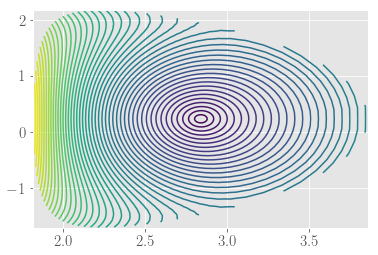

In [490]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B3[:,:,0,0],50)
#plt.xlim(2.0,2.5)
#plt.ylim(-0.25,0.25)
plt.show()

In [493]:
dB1 = B1[:,:,:,:] - B1t[:,:,np.newaxis,:]
dB2 = B2[:,:,:,:] - B2t[:,:,np.newaxis,:]
dB3 = B3[:,:,:,:] - B3t[:,:,np.newaxis,:]

In [499]:
time = np.linspace(400,1290,num=B3.shape[3])

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


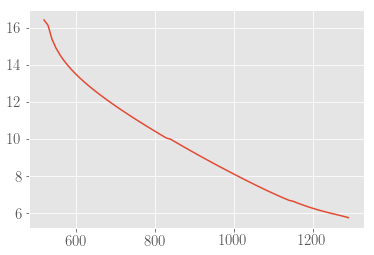

In [508]:
plt.plot(time,-np.log(dB1[70,0,0,:]))
plt.show()

In [509]:
pxr.Calculation_of_Units_and_Sizes()

Units and sizes calculated.


In [510]:
psi_min, norm = pxr.Normalization_numbers(psit,B1t,B2t)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


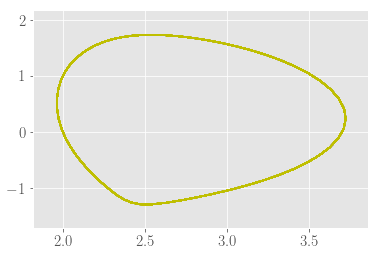

In [513]:
r_of_psi_arr, rmaxis, umaxis = pxr.create_r_psi_list(psit,B1t,B2t)

In [515]:
r_of_psi_arr.shape

(90, 101)

In [516]:
rs = r_of_psi_arr[50,:]
ps = np.linspace(0,1,num=101)

In [519]:
from scipy.interpolate import interp1d

In [520]:
p_r = interp1d(rs,ps)

In [521]:
r_p = interp1d(ps,rs)

In [534]:
r_list = r_p(ps**2)

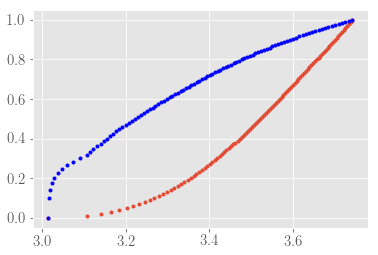

In [536]:
plt.plot(pxr.X_int((rs,0,0)),ps,".")
plt.plot(pxr.X_int((r_list,0,0)),np.sqrt(ps),"b.")
plt.show()

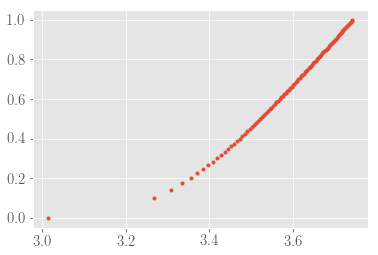

In [527]:
plt.plot(pxr.X_int((r_list,0,0)),np.sqrt(ps),".")
plt.show()

In [530]:
np.sqrt(ps)[0:10]

array([ 0.        ,  0.1       ,  0.14142136,  0.17320508,  0.2       ,
        0.2236068 ,  0.24494897,  0.26457513,  0.28284271,  0.3       ])

In [533]:
ps**2

array([  0.00000000e+00,   1.00000000e-04,   4.00000000e-04,
         9.00000000e-04,   1.60000000e-03,   2.50000000e-03,
         3.60000000e-03,   4.90000000e-03,   6.40000000e-03,
         8.10000000e-03,   1.00000000e-02,   1.21000000e-02,
         1.44000000e-02,   1.69000000e-02,   1.96000000e-02,
         2.25000000e-02,   2.56000000e-02,   2.89000000e-02,
         3.24000000e-02,   3.61000000e-02,   4.00000000e-02,
         4.41000000e-02,   4.84000000e-02,   5.29000000e-02,
         5.76000000e-02,   6.25000000e-02,   6.76000000e-02,
         7.29000000e-02,   7.84000000e-02,   8.41000000e-02,
         9.00000000e-02,   9.61000000e-02,   1.02400000e-01,
         1.08900000e-01,   1.15600000e-01,   1.22500000e-01,
         1.29600000e-01,   1.36900000e-01,   1.44400000e-01,
         1.52100000e-01,   1.60000000e-01,   1.68100000e-01,
         1.76400000e-01,   1.84900000e-01,   1.93600000e-01,
         2.02500000e-01,   2.11600000e-01,   2.20900000e-01,
         2.30400000e-01,

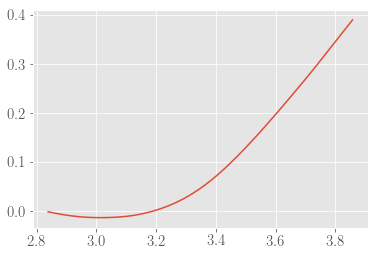

In [411]:
plt.plot(pxr.X[:,0,0],(psit[:,0,1]))
plt.show()

In [402]:
psi.shape

(129, 65, 65, 6)

In [443]:
pxr.Axes_of_Interpolation(B3)

In [444]:
pxr.Grid_Interpolations(psit,B1t,B2t,B3t)

ValueError: There are 128 points and 129 values in dimension 0

In [382]:
pxr.Calculation_of_Units_and_Sizes()

Units and sizes calculated.


In [383]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [384]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [385]:
psi_min,norm = pxr.Normalization_numbers(-psit,B1t,B2t);

0
1
2
3
4


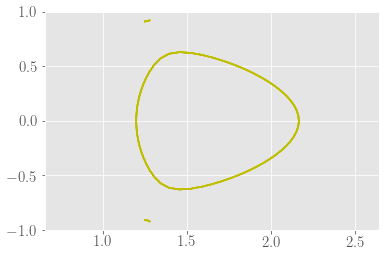

In [386]:
P = pxr.create_r_psi_list(-psit,B1t,B2t)

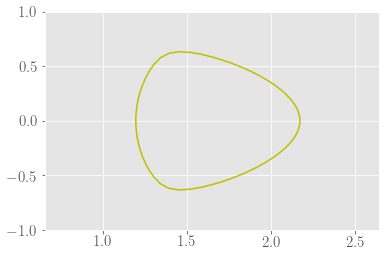

In [358]:
t=0
cs1 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psit[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.95],colors="y")
#A = cs1.collections[0].get_paths()


#for i in range(len(cs1.collections[0].get_paths())): # get the coordinates of q_95 surface
#    p1 = cs1.collections[0].get_paths()[i]
#    v1 = p1.vertices
#    x_l = v1[:,0] 
#    y_l = v1[:,1]
#    
#    lbind = np.where(v1[:,0] < X0) # left branch indices
#    lbt = int(lbind[0][0]) # top of left branch
#    lbb = int(lbind[0][-1]) # bottom of left branch
r_ma,u_ma = np.unravel_index(np.argmin(-psit[:,:,t]),(psit.shape[0],psit.shape[1])) # find index of magnetic axis
X0 = pxr.X[r_ma,u_ma,0] # x,z locations of magnetic axis
Z0 = pxr.Z[r_ma,u_ma,0]

In [359]:
A = cs1.allsegs[0][0]

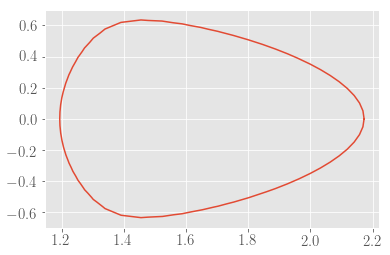

In [360]:
plt.plot(A[:,0],A[:,1])
plt.show()

In [350]:
x_l = A[:,0]
y_l = A[:,1]

In [347]:
lbind = np.where(A[:,0] < X0) # left branch indices
lbt = int(lbind[0][0]) # top of left branch
lbb = int(lbind[0][-1]) # bottom of left branch

In [351]:
if Z0 > y_l[0]: # magnetic axis higher than 1st point of flux surface
    list_fs_x = list(x_l[0:lbt-2]) # pick upper branch. Leave two points to avoid endpoint problems
    list_fs_y = list(y_l[0:lbt-2])
else:
    list_fs_x = list(x_l[lbb+2:-1]) # pick lower branch
    list_fs_y = list(y_l[lbb+2:-1])

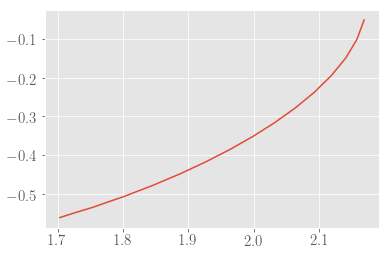

In [353]:
plt.plot(list_fs_x,list_fs_y)
plt.show()

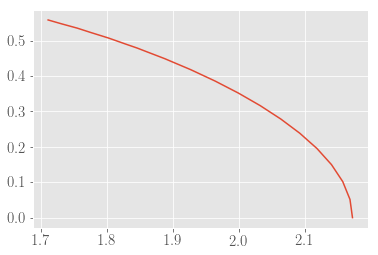

In [345]:
plt.plot(A[0:28,0],A[0:28,1])
plt.show()

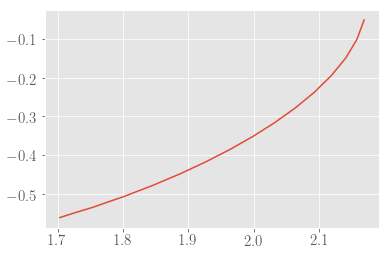

In [346]:
plt.plot(A[146:-1,0],A[146:-1,1])
plt.show()

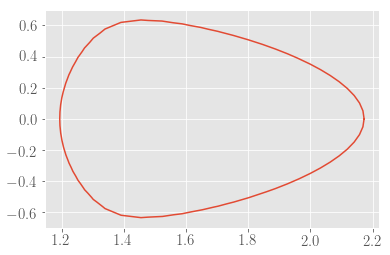

In [331]:
#plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psit[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.95],colors="y")
plt.plot(dat[:,0],dat[:,1])
plt.show()

In [297]:
v1[:,1]

array([-0.92277813, -0.92275153, -0.92274154])

In [256]:
A = np.where(v1[:,0]<X0)

In [262]:
[len(x) for x in A]

[125]

In [258]:
A[0][0]

29

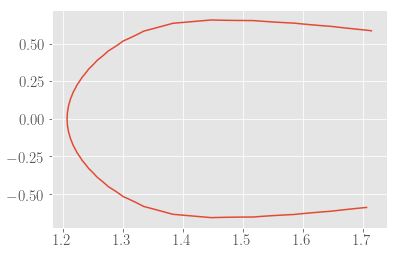

In [241]:
#plt.plot(v1[:,0],v1[:,1])
plt.plot(v1[29:153,0],v1[29:153,1])
plt.show()

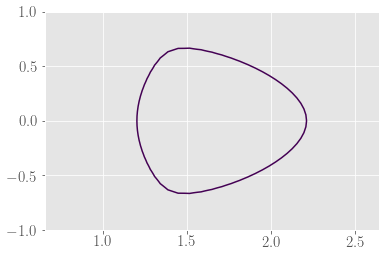

In [123]:
t=0
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psit[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.95])
#plt.colorbar()
plt.show()

In [154]:
from scipy.interpolate import interp1d

In [242]:
reload(pxr)

/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, i

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

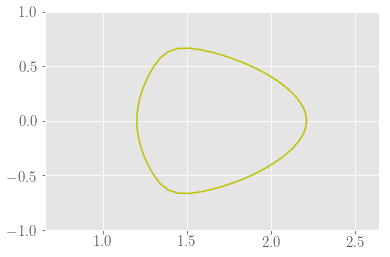

In [222]:
t=0
r_ma,u_ma = np.unravel_index(np.argmin(-psit[:,:,t]),(psit.shape[0],psit.shape[1])) # find index of magnetic axis
X0 = pxr.X[r_ma,u_ma,0] # x,z locations of magnetic axis
Z0 = pxr.Z[r_ma,u_ma,0]
        
r_ma_log = pxr.CnvNumber2LogicalR(r_ma) # r,u logical coordinates of magnetic axis 
u_ma_log = pxr.CnvNumber2LogicalU(u_ma)
Xx = pxr.intersection_of_horizontal_line_with_flux_surface(-psit[:,:,t],psi_min[t],norm[t],Z0)
H_line = np.linspace(X0,Xx,100) # horizontal line that connects magnetic axis and q95 surface
        
# convert X,Z0 pairs to logical coordinates in the shaped grid
r_of_hline = [r_ma_log] # start with first position being the magnetic axis. Procedure leaves a systematic error of 2cm.
u_of_hline = [u_ma_log]
for x in H_line[1:]:
    #r,u = pntCnvInGrid_shaped(x,Z0,r_of_hline[-1],u_of_hline[-1]) # last position is initial guess for new one
    r,u = pxr.pntCnvInGrid_simple_toroidal(x,Z0,r_of_hline[-1],u_of_hline[-1])
    r_of_hline.append(r)
    u_of_hline.append(abs(u))

# psin values of those points    
psi_val_list = (pxr.psit_int((r_of_hline,u_of_hline,t))-psi_min[t])/(norm[t]-psi_min[t])
#print(r_of_hline)

# R(psin) interpolation
        
r_of_psin = interp1d(psi_val_list[1:-1],r_of_hline[1:-1], kind = "cubic", fill_value = "extrapolate")

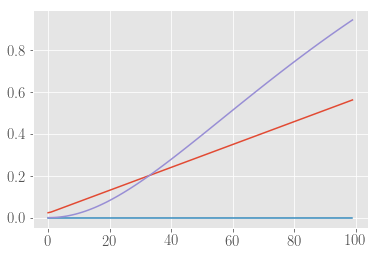

In [223]:
plt.plot([x for x in range(len(r_of_hline))],r_of_hline)
plt.plot([x for x in range(len(r_of_hline))],u_of_hline)
plt.plot([x for x in range(len(r_of_hline))],psi_val_list)
plt.show()

In [220]:
print(r_of_hline[80])
print(u_of_hline[80])

0.45825207275
-2.95744454597e-20


In [221]:
abs(-2.95744454597e-20)

2.95744454597e-20

In [212]:
(pxr.psit_int((0.45825207275,-1.0e-5,t))-psi_min[t])/(norm[t]-psi_min[t])

0.0053399709480276576

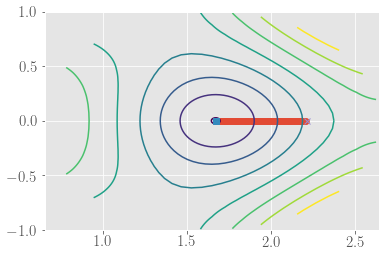

In [178]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psit[:,:,t])
plt.plot(X0,Z0,"x")
plt.plot(pxr.X_int((r_ma_log,u_ma_log,0)),pxr.Z_int((r_ma_log,u_ma_log,0)),"s")
plt.scatter(pxr.X_int((r_of_hline,0,0)),pxr.Z_int((r_of_hline,0,0)))
plt.plot(Xx,Z0,"x")
plt.show()

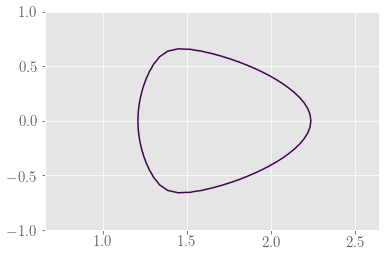

In [185]:
t=5
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psit[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.95])
plt.show()

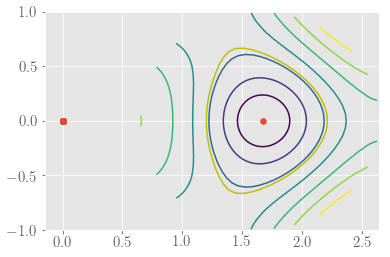

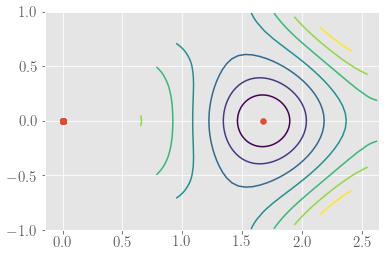

UnboundLocalError: local variable 'r_of_psin' referenced before assignment

In [143]:
pythonresult = pxr.create_r_psi_list(-psit[:,:,0:-1],B1t[:,:,0:-1],B2t[:,:,0:-1])

In [107]:
pxr.t_dim

50

In [62]:
A = pythonresult[0]

In [63]:
rmaxis = pythonresult[1]
umaxis = pythonresult[2]

In [64]:
umaxis[1]

0.0

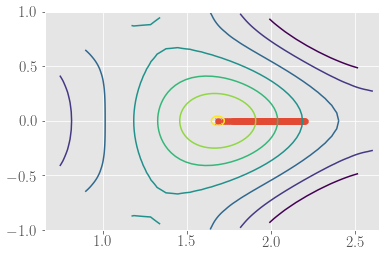

In [67]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psit[:,:,0])
plt.plot(pxr.X_int((rmaxis[0],umaxis[0],0)),pxr.Z_int((rmaxis[0],umaxis[0],0)),"x")
plt.scatter(L1,L2)
plt.show()

In [66]:
L1 = list(pxr.X_int((A[0,:],0,0)))
L2 = list(pxr.Z_int((A[0,:],0,0)))

In [53]:
r_ma,u_ma = np.unravel_index(np.argmin(-psit[:,:,0]),(psit.shape[0],psit.shape[1]))

In [54]:
r_ma

5

In [71]:
psi.shape

(129, 66, 66, 7)

In [72]:
Bx=pxr.f2c(Bx)
By=pxr.f2c(By)
Bz=pxr.f2c(Bz)
psi=pxr.f2c(psi)

## Save small arrays

In [88]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1_small.npy",B1)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2_small.npy",B2)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B3_small.npy",B3)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_small.npy",psi[:,:,0,:])

In [87]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/X.npy",pxr.X)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/Z.npy",pxr.Z)

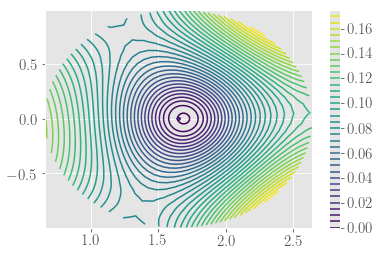

In [77]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi[:,:,0,6],40)
np.amin(psi[:,:,0,6])
plt.colorbar()
plt.show()

In [97]:
np.unravel_index(np.argmin(-psi[:,:,0,6]),(psi.shape[0],psi.shape[1]))

(5, 0)

In [33]:
print(np.amin(-psi[:,:,0,6]))
print(-psi[5,0,0,6])

-0.000911228006053
-0.000911228006053


## Interpolations and units

In [75]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [76]:
pxr.Axes_of_Interpolation(B1)

In [79]:
pxr.Grid_Interpolations(-psi[:,:,0,:],B1,B2,B3)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [80]:
pxr.Calculation_of_Units_and_Sizes()

Units and sizes calculated.


## Normalization Numbers and $r(\Psi_N)$ list

In [83]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [84]:
psi_min, norm = pxr.Normalization_numbers(-psi[:,:,0,:],pxr.B1tor,pxr.B2tor)

t= 0 is done


In [85]:
r_of_psi, r_ma = pxr.create_r_psi_list(-psi[:,:,0,:],pxr.B1tor,pxr.B2tor)

t= 0 is done


In [86]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_min_small.npy",psi_min)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/norm_small.npy",norm)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/r_of_psi_small.npy",r_of_psi)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/rmaxis_small.npy",r_ma)

## Poloidal field

In [113]:
Bp_car = np.sqrt(np.power(Bx,2)+np.power(Bz,2))

In [131]:
Bpt = np.power(np.mean(Bp_car,axis=2),2)

In [110]:
cs1 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],Bp_car[:,:,t],levels=[0])

NameError: name 'X' is not defined

In [84]:
Bp_cyl = np.multiply(B2,B_2)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


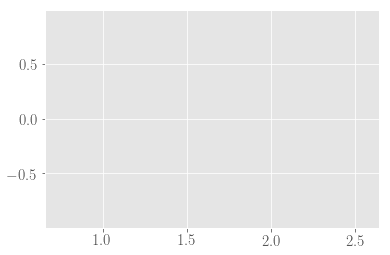

In [136]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],Bpt[:,:,5],levels=[0])
plt.show()

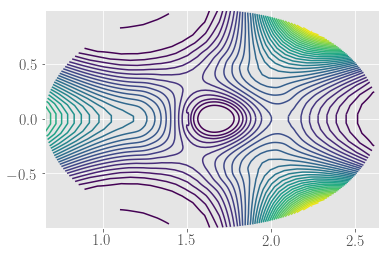

In [87]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],Bp_cyl[:,:,0,1],40)
plt.show()

In [100]:
np.unravel_index(np.argmin(Bp_cyl[:50,:,0,6]),(50,65))

(3, 7)

In [62]:
psi_pol = psi_pol[:,:,0,]

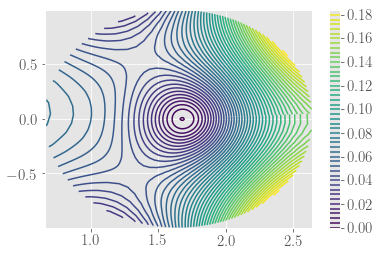

In [16]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_pol[:,:,18],50)
plt.colorbar()
plt.show()

## Saving small arrays for use in Julia module

In [43]:
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/B1_small.npy",B1)
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/B2_small.npy",B2)
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/B3_small.npy",B3)
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/psi_small.npy",-psi_pol)

## Interpolations

In [34]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [37]:
pxr.Axes_of_Interpolation(B1)
pxr.Grid_Interpolations(-psi[:,:,0,:],B1,B2,B3)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [38]:
pxr.Calculation_of_Units_and_Sizes()

Units and sizes calculated.


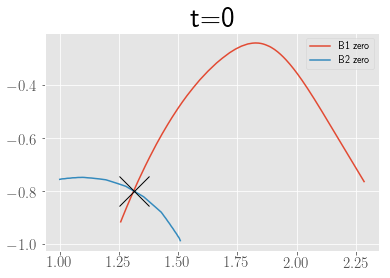

t= 0 is done


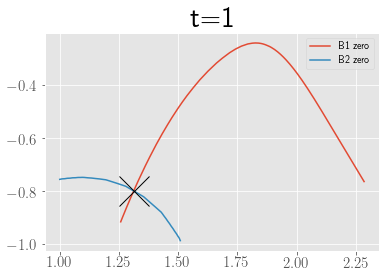

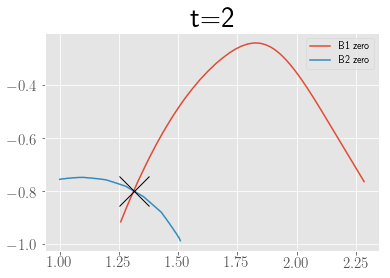

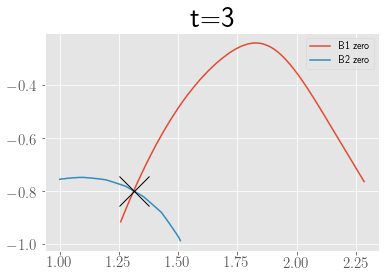

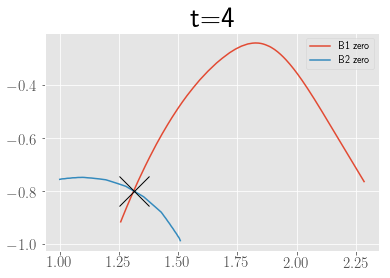

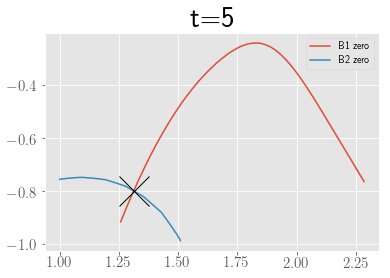

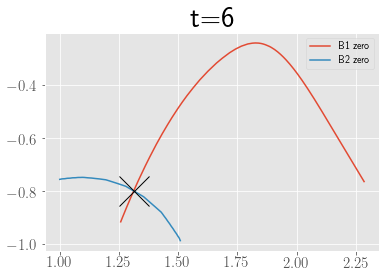

In [39]:
psi_min,norm = pxr.Normalization_numbers(-psi,pxr.B1tor,pxr.B2tor)

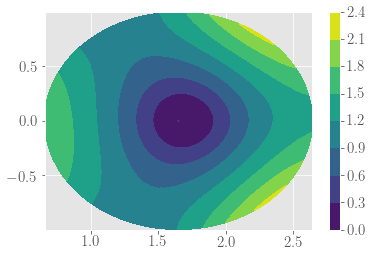

In [57]:
t=0
plt.contourf(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi[:,:,0,t]-psi_min[t])/(norm[t]-psi_min[t]))
plt.colorbar()
plt.show()

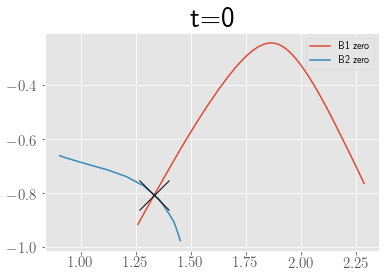

t= 0 is done


/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2467: RuntimeWarning: invalid value encountered in true_divide
  (grid[i + 1] - grid[i]))
/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/interpolate/_bsplines.py:666: RuntimeWarning: invalid value encountered in less_equal
  if x.ndim != 1 or np.any(x[1:] <= x[:-1]):
/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/interpolate/_bsplines.py:670: RuntimeWarning: invalid value encountered in less
  if t.ndim != 1 or np.any(t[1:] < t[:-1]):


LinAlgError: Collocation matix is singular.

In [66]:
R_P, RMA = pxr.create_r_psi_list2(psi_pol,pxr.B1tor,pxr.B2tor)

In [13]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/r_of_psi_first_line2.npy",R_P)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/rmaxis_first_line2.npy",RMA)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/psi_min_first_line2.npy",psi_min)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/norm_first_line2.npy",norm)

In [73]:
norm

[array(nan)]

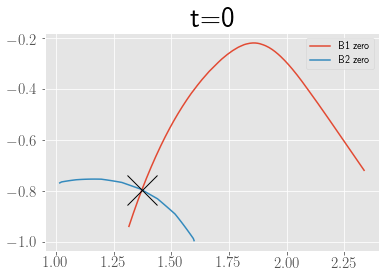

t= 0 is done


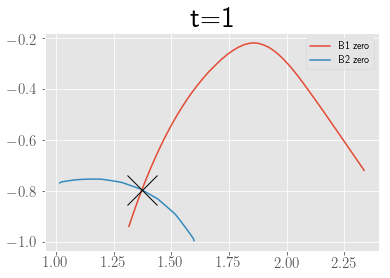

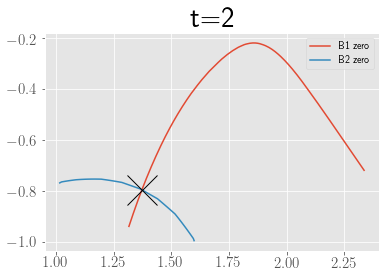

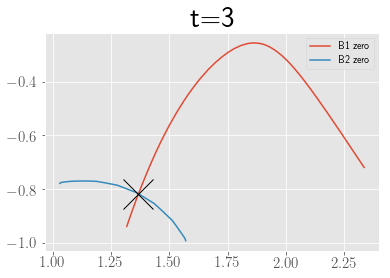

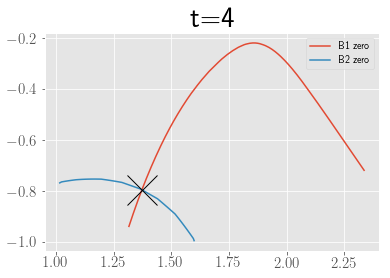

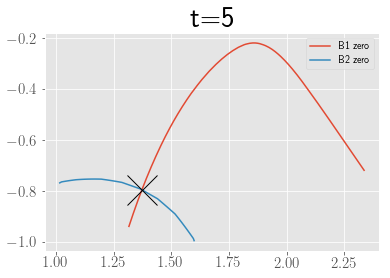

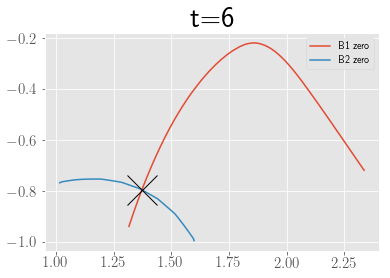

In [63]:
P,rmaxis = pxr.create_r_psi_list2(-psi_pol,pxr.dpdt,pxr.dpdr)

In [30]:
P.shape[1]

101

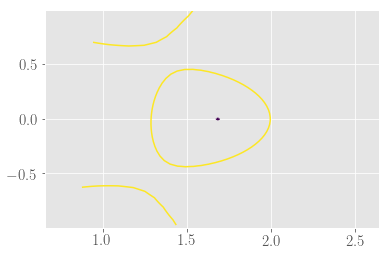

In [43]:
t=17
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psi_pol[:,:,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.001,1.0])
#plt.colorbar()
plt.show()

In [68]:
for t in range(50):
    print(np.unravel_index(np.argmin(psi_pol[:,:,t]),(psi_pol.shape[0],psi_pol.shape[1])))

(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(4, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(4, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(4, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(4, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)
(6, 63)
(3, 63)
(3, 63)
(3, 63)
(3, 63)


In [228]:
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/psi_min_small.npy",psi_min)
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/norm_small.npy",norm)
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/r_of_psi_small.npy",P)
#np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/rmaxis_small.npy",rmaxis)

In [93]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [110]:
norm_B[3]

array(0.07944422768334847)

(6, 0)


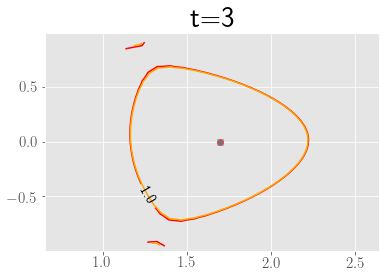

In [135]:
t=3
plt.title("t=%s"%(t))
CS = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi_pol[:,:,0,t]-psi_min_der[t])/(norm_der[t]-psi_min_der[t]),levels=[1.0],colors=['r'])
plt.clabel(CS, fmt = '%1.1f', colors = 'k', fontsize=14)
CS2 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi_pol[:,:,0,t]-psi_min_B[t])/(norm_B[t]-psi_min_B[t]),levels=[1.0],colors=['orange'])
#plt.clabel(CS2, fmt = '%1.1f', colors = 'k', fontsize=14)
#CS3 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi_pol[:,:,0,t]-psi_min_B[t])/(0.0815-psi_min_B[t]),levels=[1.0],colors=['blue'])
MA = np.unravel_index(np.argmin(-psi_pol[:,:,0,t]),(psi_pol.shape[0],psi_pol.shape[1]))
plt.plot(pxr.X[MA[0],MA[1],0],pxr.Z[MA[0],MA[1],0],'o')
plt.plot(pxr.X_int((P[t,0],0,0)),pxr.Z_int((P[t,0],0,0)),'x')
print(MA)
plt.show()

In [131]:
CS3.collections[0].get_paths()

[Path(array([[ 2.23259489,  0.02875333],
        [ 2.22539497,  0.08574989],
        [ 2.21750939,  0.11329312],
        [ 2.2096989 ,  0.1408648 ],
        [ 2.19149156,  0.18196909],
        [ 2.18668279,  0.19297175],
        [ 2.163435  ,  0.23246737],
        [ 2.15814944,  0.24156778],
        [ 2.13039911,  0.27997824],
        [ 2.12564742,  0.28662861],
        [ 2.0902886 ,  0.3284099 ],
        [ 2.08592278,  0.33291706],
        [ 2.0527676 ,  0.36729105],
        [ 2.01343795,  0.40367109],
        [ 1.97242501,  0.43794716],
        [ 1.92966858,  0.4704815 ],
        [ 1.91352572,  0.48168109],
        [ 1.88496921,  0.50160708],
        [ 1.86665578,  0.513215  ],
        [ 1.8380024 ,  0.53162657],
        [ 1.83116364,  0.53555471],
        [ 1.802217  ,  0.55250037],
        [ 1.7883232 ,  0.56082726],
        [ 1.77608945,  0.56721229],
        [ 1.75261283,  0.57984367],
        [ 1.73534757,  0.58947526],
        [ 1.73059635,  0.59168106],
        [ 1.71003894,  

In [349]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

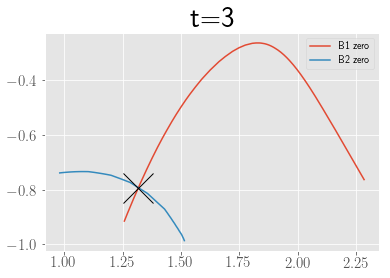

from B's: [ 1.31809907] [-0.79254773]


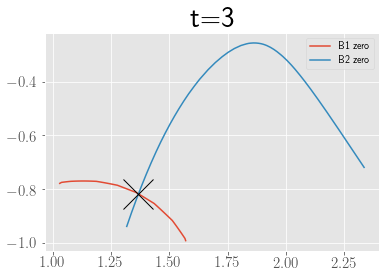

from derivatives: [ 1.36692191] [-0.81773002]


In [84]:
x_X1,z_X1 = pxr.findXpoint(B1[:,:,0,:],B2[:,:,0,:],3)
print("from B's:",x_X1,z_X1)
x_X2,z_X2 = pxr.findXpoint(pxr.dpdr,pxr.dpdt,3)
print("from derivatives:",x_X2,z_X2)

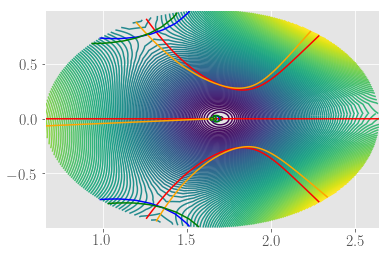

In [137]:
t=3
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi_pol[:,:,0,t],150)
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1[:,:,0,t],levels=[0],colors='r')
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B2[:,:,0,t],levels=[0],colors='blue')
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pxr.dpdt[:,:,t],levels=[0],colors='orange')
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],pxr.dpdr[:,:,t],levels=[0],colors='green')
plt.show()

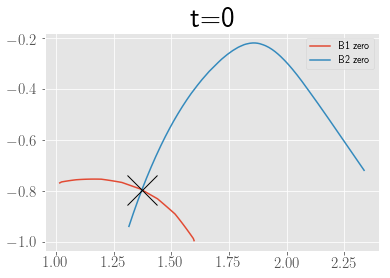

t= 0 is done


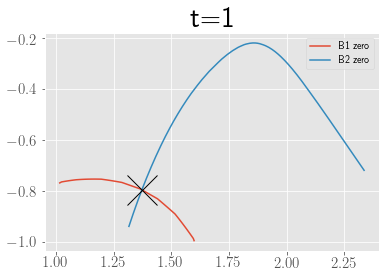

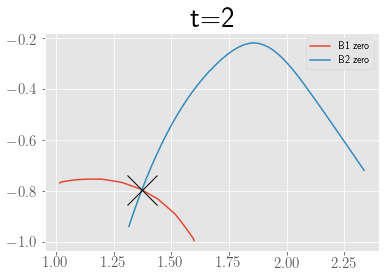

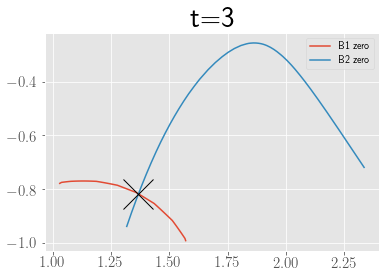

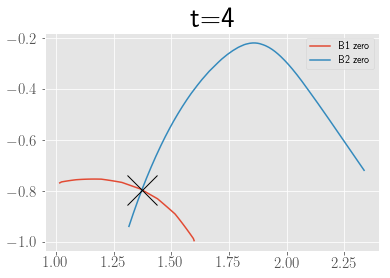

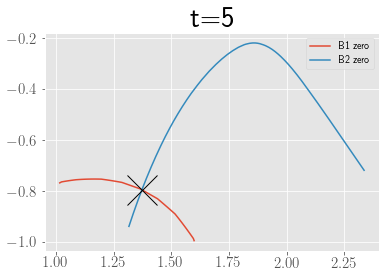

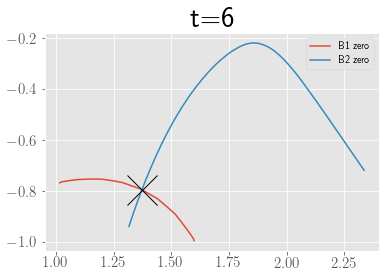

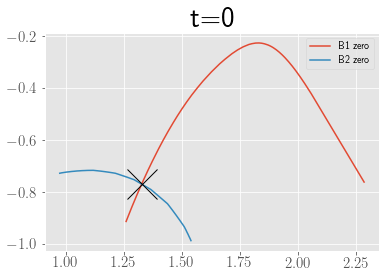

t= 0 is done


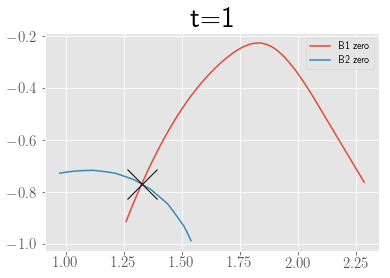

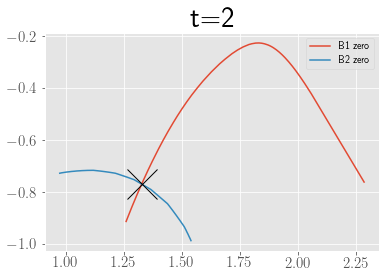

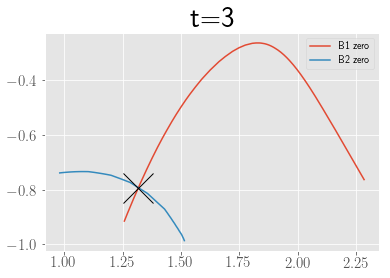

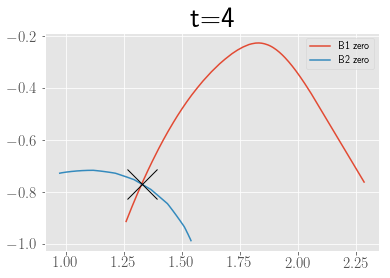

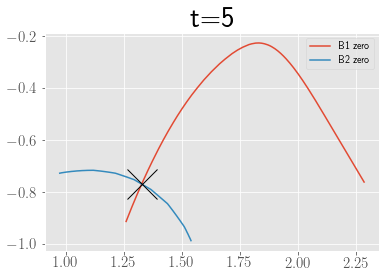

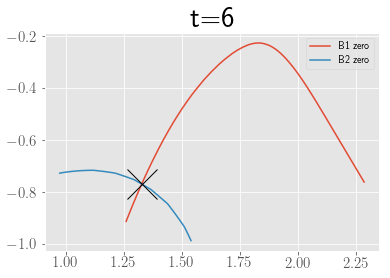

In [95]:
psi_min_der,norm_der = pxr.Normalization_numbers(-psi_pol,pxr.dpdr,pxr.dpdt)
psi_min_B,norm_B = pxr.Normalization_numbers(-psi_pol,B1[:,:,0,:],B2[:,:,0,:])

In [89]:
for i in range(len(norm_der)):
    print(norm_der[i]-norm_B[i])

0.00040718186165
0.000407134404394
0.000407086973257
0.000462632430343
0.000392712571871
0.000406991601828
0.000406936321454


In [87]:
norm_B

[array(0.07678299999629051),
 array(0.07675542785947358),
 array(0.07673175456699008),
 array(0.07944422768334847),
 array(0.07940885674642176),
 array(0.0766975235611904),
 array(0.0766834359269259)]

In [312]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [303]:
psi_min,norm = pxr.Normalization_numbers(-psi_pol,B1,B2)

t= 0 is done


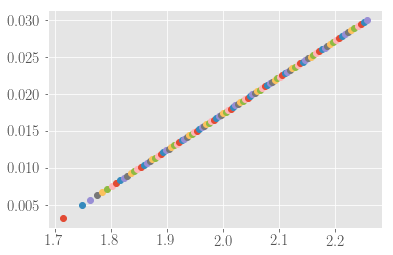

In [161]:
t=4
x_log = P[t,0]
#plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(-psi_pol[:,:,0,t]-psi_min[t])/(norm[t]-psi_min[t]),40)
for i in range(0,P.shape[1]):
    plt.plot(pxr.X_int((P[t,i],0,0)),pxr.Z_int((P[t,i],0,0)),'o')
#plt.colorbar()
#plt.plot(pxr.X_int((x_log,0,0)),pxr.Z_int((x_log,0,0)),'x')
#plt.plot(pxr.X_int((0.87604805,4.33511496,0)),pxr.Z_int((0.87604805,4.33511496,0)),'x')
#print((pxr.Psi_int((0.87604805,4.33511496,0,0))-psi_min[t])/(norm[t]-psi_min[t]))
plt.show()

In [162]:
import scipy
from scipy.interpolate import interp1d
from skimage import measure
from scipy import interpolate

In [280]:
def Rp(psi,t):
    Ind = np.unravel_index(np.argmin(psi[:,:,0,t]),(psi.shape[0],psi.shape[1])) # find index of magnetic axis
    r_ind = Ind[0] 
    u_ind = Ind[1]
    X0 = pxr.X[r_ind,u_ind,0] # x,z locations of magnetic axis
    Z0 = pxr.Z[r_ind,u_ind,0]
    cs1 = plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],(psi[:,:,0,t]-psi_min[t])/(norm[t]-psi_min[t]),levels=[0.93])
    for i in range(len(cs1.collections[0].get_paths())): # get the coordinates of q_95 surface
        p1 = cs1.collections[0].get_paths()[i]
        v1 = p1.vertices
        x1 = v1[:,0]
        y1 = v1[:,1]-Z0 # lift it to get the root of the spline with the z=z0 line
        x_l = v1[:,0]
        y_l = v1[:,1]
    tck, u = interpolate.splprep([x1, y1], s=0) # interpolate the q_95 surface
    R = interpolate.sproot(tck) # find the root of the lifted spline
    out = interpolate.splev(R[1],tck) # x,z values of the spline roots
    
    for x in out[0]: # keep the right root
        if x>X0:
            X_sep = x
            
    x_list = np.linspace(X0,X_sep,100) # list of points on the magnetic axis line
    rup = [0,0,0]
    for x in x_list:
        ri,ui = r_u_transform(x,Z0)
        psin_i = (pxr.Psi_int((ri,ui,0,t))-psi_min[t])/(norm[t]-psi_min[t])
        rup = np.vstack((rup,[ri,ui,psin_i]))
    r_sep,u_sep = r_u_transform(X_sep,Z0)
    rup = np.delete(rup,0,0)
    print("r_sep",r_sep)
    print("u_sep",u_sep)
    plt.plot(pxr.X_int((r_sep,u_sep,0)),pxr.Z_int((r_sep,u_sep,0)),'s')
    print("X:",pxr.X_int((r_sep,u_sep,0)),"Z:",pxr.Z_int((r_sep,u_sep,0)))
    print("X actual:",X_sep)
    #print(out2[0],out2[1])
    print("z0:",Z0)
    print("x0:",X0)
    plt.plot(pxr.X_int((rup[1:,0],rup[1:,1],0)),pxr.Z_int((rup[1:,0],rup[1:,1],0)))
    plt.plot(x_l,y_l)
    #plt.plot(x_list,fx,'o')
    plt.plot(X0,Z0,'o')
    plt.plot(X_sep,Z0,'s')
    plt.plot(pxr.X_int((r_sep,0,0)),pxr.Z_int((r_sep,0,0)),'o')
    plt.show()
    return rup

r_sep 0.522234653374
u_sep 0.00403723181741
X: 2.1686102576408994 Z: 0.0277130061760156
X actual: 2.17223039737
z0: 0.00210837663126
x0: 1.6908777996


/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


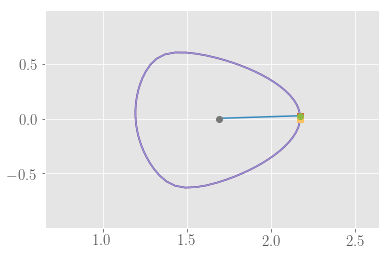

In [281]:
A = Rp(-psi_pol,2)

In [176]:
A[0,2]

0.0028513372041587249

In [289]:
#ro,uo = r_u_transform(2.17897337282,0.00210837663126)
ro,uo = pntCnvInGrid_simple_toroidal(2.17897337282,0.00210837663126)
print("ro:",ro,"uo:",uo)
print("X0:",pxr.X_int((ro,uo,0)),"Z0:",pxr.Z_int((ro,uo,0)))
print("Rmaj:",pxr.X[0,0,0])

ro: 0.528977574576 uo: 0.00398576860993
X0: 2.175284411786117 Z0: 0.02804108067348843
Rmaj: 1.65190934791


In [288]:
def pntCnvInGrid_simple_toroidal(x_co,z_co):
    """Convert an x,y point in the numerical grid. Works only for toroidal computational domain."""
    def shape_fun(x,*In):
        xx = In[0]
        zz = In[1]
        return [xx-1.65-x[0]*np.cos(x[1]), zz-x[0]*np.sin(x[1])]
    params = (x_co,z_co)
    initial_guess = [0.5,0.0]
    xcross = scipy.optimize.fsolve(shape_fun,x0=initial_guess,args=params)
    return xcross[0],xcross[1]

In [279]:
def r_u_transform2(x_co,z_co):
    def shape_fun(x,*In):
        xx = In[0]
        zz = In[1]
        return [x[0]-np.sqrt((xx-1.65)**2 + zz**2),x[1]-np.arctan2(zz,xx-1.65)]
    params = (x_co,z_co)
    initial_guess = [0.0,0.0]
    xcross = scipy.optimize.fsolve(shape_fun,x0=initial_guess,args=params, xtol=1.E-14)
    return xcross[0],xcross[1]

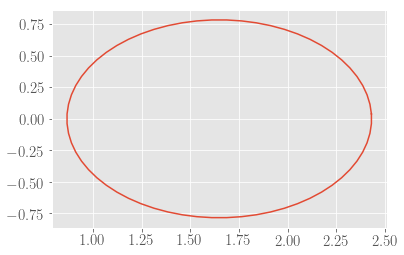

In [760]:
plt.plot(pxr.X[100,:,0],pxr.Z[100,:,0])
plt.show()

## magnetic axis

In [342]:
np.argmin(psi_pol[:,:,0,0])

8264

In [98]:
np.unravel_index(np.argmin(-psi_pol[:,:,0,4]),(128,65))

(4, 0)

In [ ]:
pxr.Psi_int((0.87604805,4.33511496,0,0))

In [ ]:
reload(pxr)

## test locator and integrator

In [ ]:
reload(pxr)

In [ ]:
pxr.test_locator(0.6)

In [ ]:
pxr.test_integrator(0.98)

## Locate X-point and magnetic axis

In [ ]:
reload(pxr)

In [ ]:
x1,y1,x2,y2 = pxr.findLevelsZero(B1,B2,0)

In [ ]:
x_X,y_X = pxr.findXpoint(B1,B2,0)
print(x_X,y_X)

In [ ]:
x_X_gr,y_X_log = pxr.pntCnvInGrid(x_X,y_X)
print(x_X_gr,y_X_log)

In [ ]:
reload(pxr)

In [ ]:
pxr.magneticAxisAndXpoint(-psi_pol,B1,B2,0)

In [ ]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi_pol[:,:,0,0],100)
R_MA = np.argmin(-psi_pol[:,0,0,0])
plt.plot(pxr.X[R_MA,0,0],pxr.Z[R_MA,0,0],"x")
plt.plot(x_X,y_X,"x")
plt.show()

In [ ]:
x_X_gr,y_X_gr = pxr.pntCnvInGrid(x_X,y_X)

In [ ]:
pxr.Psi_int((x_X_gr,y_X_gr,0.0,0))

In [ ]:
reload(pxr)

In [ ]:
r_large_grid = np.linspace(0.0,1.0,num=300)
u_large_grid = np.linspace(0.0,2.*np.pi,num=300)
RI,TI = np.meshgrid(r_large_grid,u_large_grid,indexing='ij')
X_grid = pxr.X_int((RI,TI,0))
Z_grid = pxr.Z_int((RI,TI,0))
B1_grid = pxr.B1_int((RI,TI,0,0))
B2_grid = pxr.B2_int((RI,TI,0,0))

In [ ]:
plt.contour(X_grid,Z_grid,B1_grid[:,:],levels=[0.])
plt.contour(X_grid,Z_grid,B2_grid[:,:,],levels=[0.])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi_pol[:,:,0,0],200)
plt.show()

In [ ]:
B1_tor=np.mean(B1,axis=2)
B2_tor=np.mean(B2,axis=2)
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1_tor[:,:,3],levels=[0.])
#plt.contourf(pxr.X[:,:,0],pxr.Z[:,:,0],B1[:,:,0,0])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B2_tor[:,:,3],levels=[0.])
#plt.contourf(pxr.X[:,:,0],pxr.Z[:,:,0],B2[:,:,0,0])
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],-psi_pol[:,:,0,3],200)

plt.show()

In [ ]:
reload(pxr)

In [ ]:
pxr.test_psi_normalization(4,-psi_pol,psi_min,norm)

In [ ]:
pxr.Load_Dictionary()

In [ ]:
pxr.test_psi_projection(3,psi_min,norm)

In [ ]:
psi_min,norm = pxr.Normalization_numbers(-psi_pol,B1,B2)

In [ ]:
pxr.Calculation_of_Units_and_Sizes()

In [ ]:
R_PSI = pxr.create_r_psi_list()

In [ ]:
R_PSI[0,90:100]

In [ ]:
psi_min_list,norm_list = pxr.Normalization_numbers()

In [ ]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/R_Psi_small.npy",R_PSI)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/psi_min_small.npy",np.asarray(psi_min_list))
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/norm_small.npy",np.asarray(norm_list))

In [ ]:
np.unravel_index(np.argmin(-psi_pol[:,:,:,4]),(128,65,65),order='C')

In [ ]:
print(np.amin(-psi_pol[:,0,0,0]))
print(np.amin(-psi_pol[:,:,:,0]))

In [ ]:
psi_pol.shape

In [ ]:
psi_pol[3,0,10,0]

In [ ]:
pxr.test_locator(0.999,3,psi_min_list,norm_list)

In [ ]:
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata

In [ ]:
def psi_spline():
    r_list = [] 
    u_list = [] 
    psi_list = []
    for r_ind in range(psi_pol.shape[0]):
        for u_ind in range(psi_pol.shape[1]):
            r_list.append(pxr.CnvNumber2LogicalR(r_ind))
            u_list.append(pxr.CnvNumber2LogicalU(u_ind))
            psi_list.append(psi_pol[r_ind,u_ind,0,0])
    psi_spline = interp2d(r_list,u_list,psi_list)
    r_spline = interp2d(psi_list,u_list,r_list)
    return psi_spline, r_spline            

In [ ]:
pspline,rspline = psi_spline()

In [ ]:
psi_spline_grid = pspline(pxr.r,pxr.theta)

In [ ]:
psi_spline_grid = np.swapaxes(psi_spline_grid,0,1)

In [ ]:
np.transpose(psi_spline_grid).shape
#pxr.Z[:,:,0].shape

In [ ]:
r_spline_grid = rspline(pxr.r,pxr.theta)

In [ ]:
r_spline_grid = np.swapaxes(r_spline_grid,0,1)

In [ ]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],psi_spline_grid)
plt.show()

In [ ]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],r_spline_grid)
plt.show()

## Loading Arrays from Julia module

In [341]:
def smooth(Ql):
    QF = np.roll(Ql,1,axis=3)
    QFF = np.roll(Ql,2,axis=3)
    QB = np.roll(Ql,-1,axis=3)
    QBB = np.roll(Ql,-2,axis=3)
    Q_new = (2*(QF+QB)+QFF+QBB)/6
    return Q_new

In [305]:
def smooth_times(Q,n):
    sL = Q
    for i in range(n):
        sL = smooth(sL)
    return sL

In [162]:
Q_jul = np.load("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/Q_mid.npy")

In [163]:
Q_jul.shape

(100, 100, 65, 79)

In [35]:
#time_list = [x for x in range(600,679)]

In [ ]:
time_list = [x for x in range(600,679)]

In [34]:
psi_list = np.linspace(0,1,100)

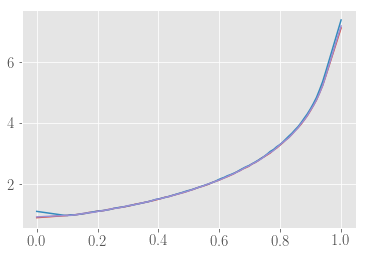

In [166]:
plt.plot(psi_list,Q_jul[:,0,0,0])
plt.plot(psi_list,Q_jul[:,0,0,8])
plt.plot(psi_list,Q_jul[:,0,0,9])
plt.show()

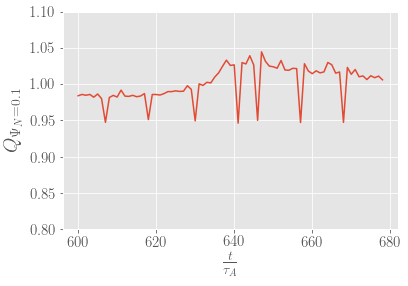

In [179]:
plt.plot(time_list[:],Q_jul[10,0,0,:])
plt.xlabel(r'$\frac{t}{\tau_A}$')
plt.ylabel(r'$Q_{\Psi_N = 0.1}$')
plt.ylim(0.8,1.1)
plt.show()

In [205]:
plt.plot(time_list,-Q_sm[4,:])
plt.xlabel(r'$\frac{t}{\tau_A}$')
plt.ylabel(r'$Q_{mag.axis}$')
plt.show()

NameError: name 'Q_sm' is not defined

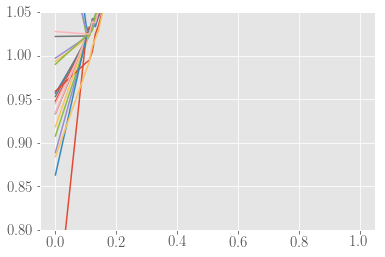

In [336]:
plt.plot(psi_list,-Q_jul[:,0,0,0])
plt.plot(psi_list,-Q_jul[:,0,0,1])
plt.plot(psi_list,-Q_jul[:,0,0,2])
plt.plot(psi_list,-Q_jul[:,0,0,3])
plt.plot(psi_list,-Q_jul[:,0,0,4])
plt.plot(psi_list,-Q_jul[:,0,0,5])
plt.plot(psi_list,-Q_jul[:,0,0,6])
plt.plot(psi_list,-Q_jul[:,0,0,7])
plt.plot(psi_list,-Q_jul[:,0,0,8])
plt.plot(psi_list,-Q_jul[:,0,0,9])
plt.plot(psi_list,-Q_jul[:,0,0,10])
plt.plot(psi_list,-Q_jul[:,0,0,11])
plt.plot(psi_list,-Q_jul[:,0,0,12])
plt.plot(psi_list,-Q_jul[:,0,0,13])
plt.plot(psi_list,-Q_jul[:,0,0,14])
plt.plot(psi_list,-Q_jul[:,0,0,15])
plt.plot(psi_list,-Q_jul[:,0,0,16])
plt.plot(psi_list,-Q_jul[:,0,0,17])
plt.plot(psi_list,-Q_jul[:,0,0,18])
plt.plot(psi_list,-Q_jul[:,0,0,19])
plt.plot(psi_list,-Q_jul[:,0,0,20])
plt.ylim(0.8,1.05)
plt.show()

In [22]:
#b_hat_rho = np.load("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/b_hat_rho_nc_mid.npy")

In [23]:
b_hat_rho = np.load("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/b_hat_rho_nc_small.npy")

In [24]:
b_hat_rho.shape

(100, 100, 65, 7)

In [342]:
b_hat_rho = smooth_times(b_hat_rho,40)

In [25]:
dphi = 2*np.pi/b_hat_rho.shape[2]
dtheta = 2*np.pi/b_hat_rho.shape[1]

In [26]:
N_p = b_hat_rho.shape[2]
dt_p = dphi
T_p = dt_p*N_p
df_p = 1/T_p
dw_p = 2*np.pi/T_p
freq_p = np.fft.fftfreq(N_p)

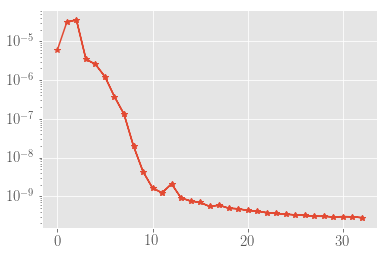

In [28]:
fou_p = np.fft.fft(b_hat_rho[5,0,:,4])
plt.semilogy(abs(freq_p*N_p*dw_p),abs(fou_p)**2,'*-')
plt.show()

In [29]:
N_t = b_hat_rho.shape[1]
dt_t = dtheta
T_t = dt_t*N_t
df_t = 1/T_t
dw_t = 2*np.pi/T_t
freq_t = np.fft.fftfreq(N_t)

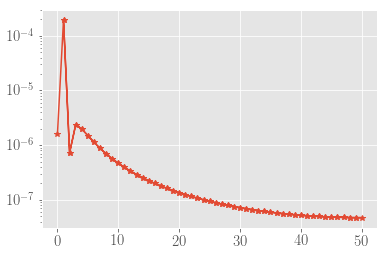

In [30]:
fou_t = np.fft.fft(b_hat_rho[5,:,0,4])
plt.semilogy(abs(freq_t*N_t*dw_t),abs(fou_t)**2,'*-')
plt.show()

In [31]:
b_tilda = []
for r in range(b_hat_rho.shape[0]):
    for uf in range(b_hat_rho.shape[1]):
        b_tilda.append(np.fft.fft(b_hat_rho[r,uf,:,4]))
b_tilda = np.reshape(b_tilda,(b_hat_rho.shape[0],b_hat_rho.shape[1],b_hat_rho.shape[2]))

In [32]:
b_tilda2 = []
for r in range(b_hat_rho.shape[0]):
    b_tilda2.append(np.fft.fft(b_tilda[r,:,1]))
b_tilda2 = np.reshape(np.asarray(b_tilda2),(b_hat_rho.shape[0],b_hat_rho.shape[1]))

NameError: name 'psi_list' is not defined

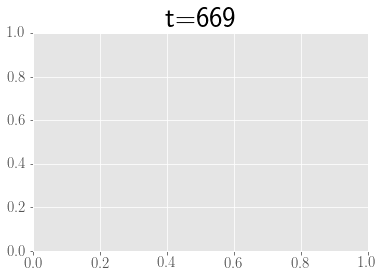

In [33]:
plt.title('t=669')
#plt.plot(psi,np.asarray(b_tilda2[:,0]).imag,'r',label='m=0')
plt.plot(psi_list,np.asarray(b_tilda2[:,1]).imag,'r',label='m=1')
plt.plot(psi_list,np.asarray(b_tilda2[:,2]).imag,'y',label='m=2')
plt.plot(psi_list,np.asarray(b_tilda2[:,3]).imag,'g',label='m=3')
plt.plot(psi_list,np.asarray(b_tilda2[:,4]).imag,'c',label='m=4')
plt.plot(psi_list,np.asarray(b_tilda2[:,5]).imag,'b',label='m=5')
plt.xlabel(r'$\Psi_N$')
plt.ylabel(r'Im($\hat{b}^{\rho}_{m/1}$)')
plt.ylim(-0.4,0.4)
plt.legend()
plt.show()

In [150]:
bfft = []
for r in range(b_hat_rho.shape[0]):
    for uf in range(b_hat_rho.shape[1]):
        for time in range(b_hat_rho.shape[3]):
            bfft.append(np.fft.fft(b_hat_rho[r,uf,:,time]))
bfft = np.reshape(np.asarray(bfft),(b_hat_rho.shape[0],b_hat_rho.shape[1],b_hat_rho.shape[3],b_hat_rho.shape[2]))
bfft = np.swapaxes(bfft,2,3)

In [151]:
bfft1 = []
for r in range(b_hat_rho.shape[0]):
    for time in range(b_hat_rho.shape[3]):
        bfft1.append(np.fft.fft(bfft[r,:,1,time]))
bfft1 = np.reshape(np.asarray(bfft1),(b_hat_rho.shape[0],b_hat_rho.shape[3],b_hat_rho.shape[1]))
bfft1 = np.swapaxes(bfft1,1,2)

NameError: name 'time_list' is not defined

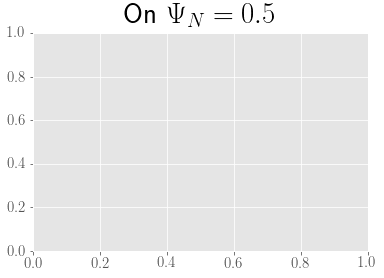

In [69]:
psi_val = 0.5
psi_pos = int(100*psi_val)
plt.title(r"On $\Psi_N =  %s$"%(psi_val))
plt.plot(time_list,bfft1[psi_pos,1,:].imag,'r',label='m=1')
plt.plot(time_list,bfft1[psi_pos,2,:].imag,'y',label='m=2')
plt.plot(time_list,bfft1[psi_pos,3,:].imag,'g',label='m=3')
plt.plot(time_list,bfft1[psi_pos,4,:].imag,'c',label='m=4')
plt.plot(time_list,bfft1[psi_pos,5,:].imag,'k',label='m=5')
#plt.axvline(x=440)
#plt.axvline(x=607)
plt.xlabel(r'$\frac{t}{\tau_A}$')
plt.ylabel(r'Im($\hat{b}^{\rho}_{m/1}$)')
plt.legend()
plt.show()

In [443]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [ ]:
P = pxr.create_r_psi_list(-psi_pol,B1,B2)

In [ ]:
P.shape

In [ ]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/r_of_psi_small.npy",P)

In [ ]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/psi_min_small.npy",psi_min)

In [ ]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/norm_small.npy",norm)

In [440]:
A = np.linspace(0.0,1.0,101)

In [442]:
A[33]

0.33000000000000002

In [86]:
from scipy.interpolate import interp1d

In [74]:
norm = 0.08227480225592361 # (Bonfiglio sawtooth)
psi_min = -0.0003898962188657237 # (Bonfiglio sawtooth)

In [78]:
np.unravel_index(np.argmin(-psi_pol[:,:,0]),(128,65))

(3, 0)

In [80]:
PN = (-psi_pol[:,:,0]-psi_min)/(norm-psi_min)

In [79]:
-psi_pol[3,0,0]

-0.00043838965711798743

In [84]:
Psin = PN[3:,0]

In [87]:
psin_list = np.linspace(0.0,1.0,101)
r_log_mag_axis = pxr.CnvNumber2LogicalR(3)
R_list = np.linspace(r_log_mag_axis,1,len(Psin))
r_of_psin = interp1d(Psin, R_list, kind = "quadratic", fill_value = "extrapolate")
r_of_psi_list = r_of_psin(psin_list)

In [89]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/r_of_psi_t0.npy",r_of_psi_list)

## Cell-Centered Data to Node-Centered data

In [446]:
B3.shape

(128, 64, 32, 4)

In [447]:
# definitions of cell grid
num_r_cells = B3.shape[0]
num_u_cells = B3.shape[1]
num_phi_cells = B3.shape[2]
dn_r = (1.0/num_r_cells)
dn_u = ((2.0*np.pi)/num_u_cells)

In [451]:
# Cell-based grid
rc = np.linspace(0.0+(dn_r/2.0),1.0-(dn_r/2.0),num_r_cells)
uc = np.linspace(0.0+(dn_u/2.0),2.0*np.pi-(dn_u/2.0),num_u_cells)
phic = np.linspace(0.0+(dn_u/2.0),2.0*np.pi-(dn_u/2.0),num_phi_cells)
tn = np.linspace(0, B3.shape[3]-1,B3.shape[3])

In [454]:
# Node-based grid
rn = np.linspace(0.0,1.0,(num_r_cells+1))
un = np.linspace(0.0,2.0*np.pi,(num_u_cells+1))
phin = np.linspace(0.0,2.0*np.pi,(num_phi_cells+1))

In [456]:
from scipy.interpolate import RegularGridInterpolator

In [459]:
B1_int = RegularGridInterpolator((rc,uc,phic,tn), B1[:,:,:,:], method='linear', bounds_error=False, fill_value = None)

In [461]:
RI,UI,PI,TI = np.meshgrid(rn,un,phin,tn,indexing='ij')

In [462]:
B1n = B1_int((RI,UI,PI,TI))

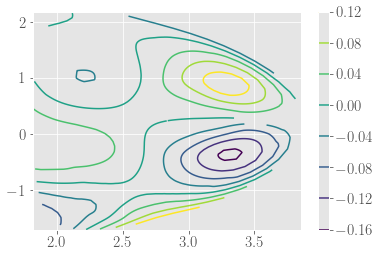

In [463]:
plt.contour(pxr.Xc[:,:,0],pxr.Zc[:,:,0],B1[:,:,0,0])
plt.colorbar()
plt.show()

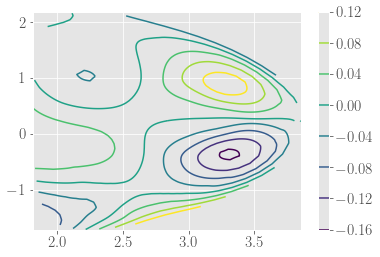

In [464]:
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B1n[:,:,0,0])
plt.colorbar()
plt.show()

In [15]:
q = np.load("/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/300x/pixie3d-n0=300x.scratch/q_mpi.npy")

In [16]:
q.shape

(101, 103)

In [17]:
r = [x for x in range(101)]

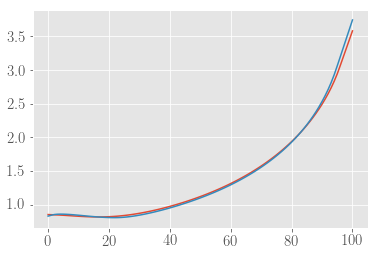

In [23]:
plt.plot(r,-q[:,-1])
plt.plot(r,-q[:,0])
plt.show()